In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_excel('superstore_sales.xlsx')
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


In [54]:
def check_df(dataframe):
    print('------ head ------')
    print(dataframe.head())
    print('------ info ------')
    print(dataframe.info())
    print('------ shape ------')
    print(dataframe.shape)
    print('------ tail ------')
    print(dataframe.tail())
    print('------ describe ------')
    print(dataframe.describe().T)
check_df(df)

------ head ------
          order_id order_date  ship_date       ship_mode    customer_name  \
0     AG-2011-2040 2011-01-01 2011-01-06  Standard Class  Toby Braunhardt   
1    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   
2     HU-2011-1220 2011-01-01 2011-01-05    Second Class    Annie Thurman   
3  IT-2011-3647632 2011-01-01 2011-01-05    Second Class     Eugene Moren   
4    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name    sales  \
0  Office Supplies      Storage     

In [3]:
# Check if there is null values in a dataframe 
def missing_values(dataframe):
    missing=[col for col in dataframe.columns if dataframe[col].isnull().sum()>0]
    sorts=dataframe[missing].isnull().sum().sort_values(ascending=True)
    ratio=(dataframe[missing].isnull().sum() * 100 / len(dataframe))
    concat=pd.concat([sorts, np.round(ratio,2)], axis=1, keys=['missing_values','ratio'])
    print(concat)

In [4]:
missing_values(df)

Empty DataFrame
Columns: [missing_values, ratio]
Index: []


In [5]:
df.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011


In [55]:
df.select_dtypes(include='object')

,order_id,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,order_priority
0,AG-2011-2040,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",Medium
1,IN-2011-47883,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",Medium
2,HU-2011-1220,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",High
3,IT-2011-3647632,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",High
4,IN-2011-47883,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,Standard Class,Erica Bern,Corporate,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",Medium
51286,MO-2014-2560,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",Medium
51287,MX-2014-110527,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",Medium
51288,MX-2014-114783,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",Medium


In [56]:
df.select_dtypes(include=['int64', 'float64'])

,sales,quantity,discount,profit,shipping_cost,year
0,408.300,2,0.0,106.1400,35.460,2011
1,120.366,3,0.1,36.0360,9.720,2011
2,66.120,4,0.0,29.6400,8.170,2011
3,44.865,3,0.5,-26.0550,4.820,2011
4,113.670,5,0.1,37.7700,4.700,2011
...,...,...,...,...,...,...
51285,13.904,2,0.2,4.5188,0.890,2014
51286,3.990,1,0.0,0.4200,0.490,2014
51287,26.400,3,0.0,12.3600,0.350,2014
51288,7.120,1,0.0,0.5600,0.199,2014


In [58]:
df.duplicated().sum()

0

In [6]:
# Use of groupby to print out the sales by the product_names 
df.groupby(['product_name']).agg({'sales':'sum'})

,sales
product_name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660
iOttie HLCRIO102 Car Mount,215.892
iOttie XL Car Mount,223.888


In [7]:
df.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011


In [8]:
# Plot the product_name and sales data 
pl=pd.DataFrame(df.groupby('product_name')['sales'].sum())[:5]
pl.sort_values(by=['sales'], ascending=False, inplace=True)
pl

,sales
product_name,
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
#10 Self-Seal White Envelopes,108.682
"#10 Gummed Flap White Envelopes, 100/Box",41.300
"""While you Were Out"" Message Book, One Form per Page",25.228


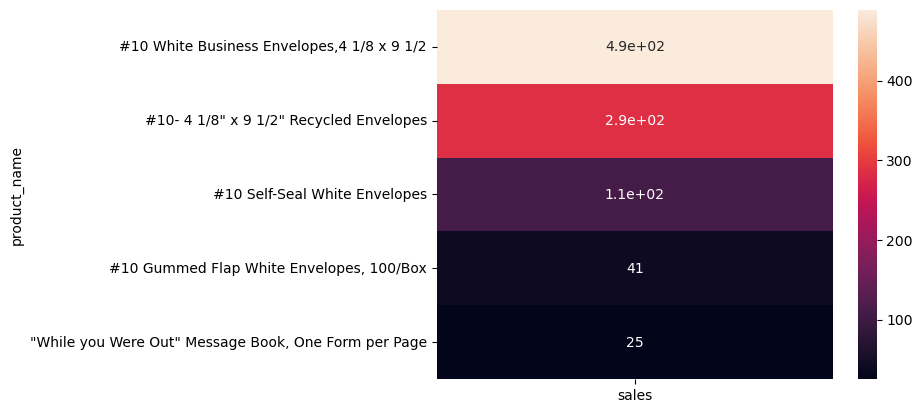

In [14]:
sns.heatmap(pl, annot=True);

In [10]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [11]:
df.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011


In [18]:
# Use of groupby to print out the profit by the segment 
prof=df.groupby('segment').agg({'profit':'sum'})
prof.sort_values(by=['profit'],ascending=False, inplace=True)
prof

,profit
segment,
Consumer,749239.78206
Corporate,442785.85866
Home Office,277009.18056


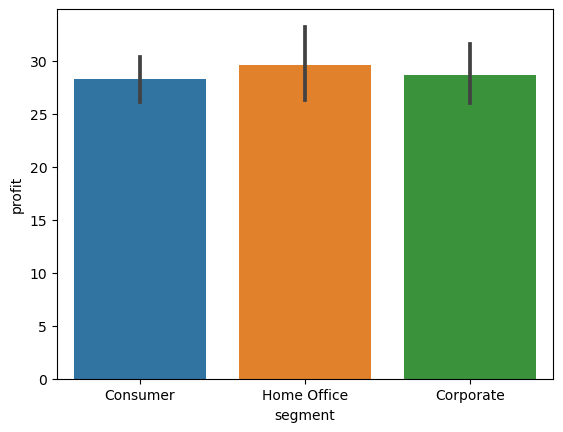

In [19]:
# Visualize the the profit by the segment  data
sns.barplot(x='segment', y='profit', data=df);

In [21]:
df.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011


In [24]:
df['category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [64]:
df.groupby(['category','country', 'segment']).agg({'sales':'mean'})

sales
category   country     segment               
Furniture  Afghanistan Consumer      240.6800
                       Corporate    1084.5000
                       Home Office   990.5500
           Albania     Consumer      414.0300
                       Corporate     210.9600
...                                       ...
Technology Zambia      Corporate     551.2725
                       Home Office   368.5300
           Zimbabwe    Consumer       86.3190
                       Corporate     162.8070
                       Home Office    89.7210

[1088 rows x 1 columns]

In [28]:
df['country'].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Canada',
       'New Zealand', 'Iraq', 'Philippines', 'United Kingdom', 'Malaysia',
       'Guatemala', 'Iran', 'Thailand', 'Tanzania', 'Brazil', 'Mexico',
       'Cuba', 'France', 'United States', 'Japan', 'Sudan', 'Taiwan',
       'Indonesia', 'Vietnam', 'Angola', 'China', 'Mozambique', 'Lebanon',
       'Singapore', 'Netherlands', 'Nigeria', 'Egypt', 'Venezuela',
       'South Africa', 'Spain', 'India', 'Turkey', 'Austria', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'El Salvador',
       'Denmark', 'Saudi Arabia', 'Zambia', 'Myanmar (Burma)', 'Russia',
       'Mongolia', 'Belgium', 'Kenya', 'Colombia', 'Estonia',
       'Madagascar', 'Portugal', 'Morocco', 'Sierra Leone', 'Norway',
       'Central African Republic', 'Czech Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Switzerland',
       'Moldova', 'Uganda', 'Zimbabwe', 'Niger', 'Senegal', 'Hong Kong',
       'Democratic Republic o

In [33]:
data=df[(df['country']=='Azerbaijan')]

In [69]:
data.groupby(['segment','category']).agg({'sales':'mean'})

sales
segment     category                   
Consumer    Furniture        351.347091
            Office Supplies  116.390194
            Technology       427.339534
Corporate   Furniture        354.519792
            Office Supplies  126.745309
            Technology       444.855810
Home Office Furniture        336.825131
            Office Supplies  115.309021
            Technology       535.976658

In [68]:
united=df[(df['country']=='United States')]
united.groupby(['segment','category']).agg({'sales':'mean'})
united

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
38,CA-2011-103800,2011-01-04,2011-01-08,Standard Class,Darren Powers,Consumer,Texas,United States,US,Central,...,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,1.82,High,2011
46,CA-2011-112326,2011-01-05,2011-01-09,Standard Class,Phillina Ober,Home Office,Illinois,United States,US,Central,...,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,13.59,High,2011
48,CA-2011-112326,2011-01-05,2011-01-09,Standard Class,Phillina Ober,Home Office,Illinois,United States,US,Central,...,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,0.99,High,2011
49,CA-2011-112326,2011-01-05,2011-01-09,Standard Class,Phillina Ober,Home Office,Illinois,United States,US,Central,...,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,0.55,High,2011
57,CA-2011-141817,2011-01-06,2011-01-13,Standard Class,Mick Brown,Consumer,Pennsylvania,United States,US,East,...,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,1.85,Low,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51257,CA-2014-126221,2014-12-31,2015-01-06,Standard Class,Chuck Clark,Home Office,Indiana,United States,US,Central,...,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2,0.0,56.5110,8.32,Medium,2014
51260,CA-2014-143259,2014-12-31,2015-01-04,Standard Class,Patrick O'Donnell,Consumer,New York,United States,US,East,...,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,7.21,High,2014
51281,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750,2.06,Medium,2014
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,2014


In [44]:
# Group category and sub-category for the quantity column with groupby method 
df.groupby(['category','sub_category']).agg({'quantity':'sum'})

quantity
category        sub_category          
Furniture       Bookcases         8310
                Chairs           12336
                Furnishings      11225
                Tables            3083
Office Supplies Appliances        6078
                Art              16301
                Binders          21429
                Envelopes         8380
                Fasteners         8390
                Labels            9322
                Paper            12822
                Storage          16917
                Supplies          8543
Technology      Accessories      10946
                Copiers           7454
                Machines          4906
                Phones           11870

In [45]:
df.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011


In [75]:
df.groupby('region').agg({'sales':'mean','profit':'mean'})

,sales,profit
region,,
Africa,170.868370,19.374674
Canada,174.292109,46.399453
Caribbean,191.882166,20.456403
Central,253.872674,28.011512
Central Asia,367.591097,64.687591
EMEA,160.302508,8.728966
East,238.336110,32.135808
North,260.849656,40.668329
North Asia,362.835663,70.820539


In [77]:
df.groupby(['region','year']).agg({'sales':'mean'})

sales
region         year            
Africa         2011  161.610259
               2012  163.810323
               2013  177.023796
               2014  174.283522
Canada         2011  137.243710
               2012  180.862921
               2013  180.765566
               2014  182.370945
Caribbean      2011  197.382107
               2012  185.397621
               2013  190.994715
               2014  193.918301
Central        2011  263.896963
               2012  256.189416
               2013  249.988587
               2014  250.343992
Central Asia   2011  344.240296
               2012  393.966971
               2013  384.177851
               2014  351.615004
EMEA           2011  162.019382
               2012  153.009705
               2013  156.453122
               2014  166.585281
East           2011  248.898369
               2012  242.751641
               2013  235.986026
               2014  231.279193
North          2011  271.604435
               2012  273.683657
               2013  242.148048
               2014  261.525758
North Asia     2011  417.439191
               2012  311.569184
               2013  376.574652
               2014  350.875771
Oceania        2011  314.529468
               2012  315.739485
               2013  330.481185
               2014  303.797054
South          2011  246.137085
               2012  223.284895
               2013  245.649626
               2014  246.036150
Southeast Asia 2011  262.346165
               2012  285.525961
               2013  283.896625
               2014  290.528968
West           2011  223.726222
               2012  218.015965
               2013  233.428235
               2014  228.055073

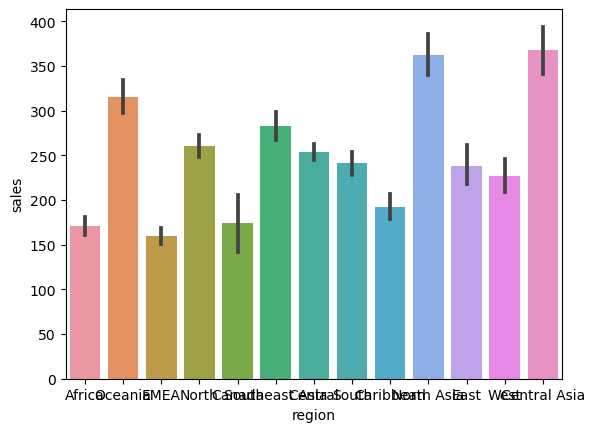

In [80]:
sns.barplot(x='region', y='sales', data=df);